# Part 1: Exploritory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

Start by looking at the logins data.

In [2]:
#read in the data
logins = pd.io.json.read_json("logins.json")
#check that it loaded correctly
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
#How many columns/rows exist in this DataFrame
logins.shape

(93142, 1)

In [4]:
#is there any missing data?
logins.isna().sum()

login_time    0
dtype: int64

In [5]:
logins.describe(datetime_is_numeric=True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648247
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


It looks like this data is from about 3 months of logins and there are no null columns in this dataset.

In [6]:
#aggrigate logins data to 15 minute bins
logins = logins.set_index('login_time', drop=False)
aggLogins = logins['login_time'].groupby(logins.index.floor('15T')).count()
aggLogins.columns = ['index','Count']
aggLogins.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Name: login_time, dtype: int64

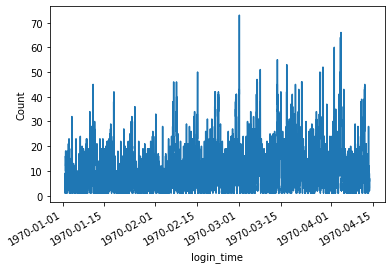

In [7]:
#How do these counts look over time?
aggLogins.plot(x=aggLogins.index,y='Count')
plt.ylabel('Count')
plt.show()

It deffinitly looks like there is some cyclical nature to the logins

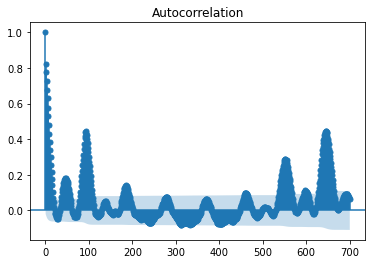

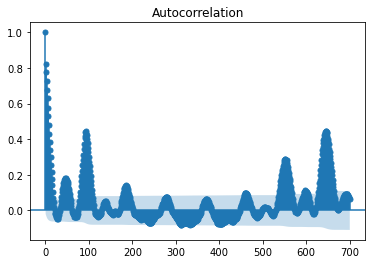

In [8]:
#lets look at the autocorrolaiton for this data
plot_acf(aggLogins,lags=700, alpha=0.05)

a lag of 48 would be a sign of AM/PM autocorroloation - this seems to exist in this data \
a lag of 96 would be a sign of daily autocorroloation - this also seems to exist in this data \
a lag of 672 would be a sign of weekly autocorroloation - This also seems to be present in this data \
There are other peaks in this plot that are likely combinations of these three.


# Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on: \
a. how you will implement the experiment \
b. what statistical test(s) you will conduct to verify the significance of the
observation \
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

1. This experiment seems to be designed to increase driver utilization during "off times" for the city in question. Therefore as a success metric I would recomend using percentage of driver time engaged in fare generating activity or increase in number of rides fielded over the driver's previous average. \
2. \
a. To actually conduct this experiment I would reccomend a pilot program where a randomly selected protion of the active drivers were provided the proposed reimbursement. This would present the ability to utilize the driving partners not in the pilot population to act as a control group.  For this experiment the null hypothisis would be that there is no difference in the utilization of the two populations. Due to the observation that there is cyclicity in the login information I would run this experiment for a minimum of several weeks to capture the difference between day and night, week and weekend, along with intraweek variation. \
b. Based on the distribution of the utilization data I would either perform a Person's chi-squared test to establish a p-value or a Welch’s t-test if the distributions seemed to be non-normal. The key feature of investigation would be if the utilization metrics for the pilot group were higher than the control group.\
c. To interpret these results I would look for an increase in driver utilization between the toll reimbursed drivers when compared to non-toll reimbursed drivers. Specifically, were I to find a statistically significant mean utilization increase, I would recommend moving forward with this program. A few caveates to this experiment are: 
   - while reimbursement of tolls may allow partner drivers to operate in the other city, unless there is a deficite of drivers there may not be any additional utilization. 
   - The impacts of a small portion of the drivers being able to work in both cities may not be equal to a full roll out of this program. Specifically if the entire population is able to cross regions this may result in an oversupply of driver partners, leading to a decrease in utilization. 
   - This program could casue issues with driver partner availability in less desirable times due to increased ability for drivers to work when they want.

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days. \
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate. \
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge. 
   1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained? 
   2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance. 
   3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).


In [9]:
#read in the data
cohort = pd.io.json.read_json("ultimate_data_challenge.json")
#check that it loaded correctly
cohort.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [10]:
cohort.shape

(50000, 12)

In [11]:
cohort.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [12]:
cohort.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [13]:
cohort.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [14]:
#going to fill the missing values with means for ratings and create a none catagory for phone
cohort.phone.fillna('none',inplace=True)
cohort.avg_rating_of_driver.fillna(cohort.avg_rating_of_driver.mean(),inplace=True)
cohort.avg_rating_by_driver.fillna(cohort.avg_rating_by_driver.mean(),inplace=True)

In [15]:
#lets figure out when the cutoff needs to be for flagging a user as active
from datetime import datetime
from datetime import timedelta
datepull = datetime.strptime(cohort.last_trip_date.max(),'%Y-%m-%d')
activecutoff = datepull - timedelta(30)
print(activecutoff)

2014-06-01 00:00:00


In [16]:
#need to fix the fact that last_trip_date is a string and not a datetime
cohort['last_trip_date'] = cohort['last_trip_date'].apply(pd.to_datetime)

In [17]:
cohort['active'] = 0
cohort.loc[cohort['last_trip_date']>activecutoff,'active'] = 1
cohort.active.value_counts()

0    31690
1    18310
Name: active, dtype: int64

It looks like only 36.6% of the users from this cohort are still considered active.

Lets take some time to look at the other columns in context of who is still active.

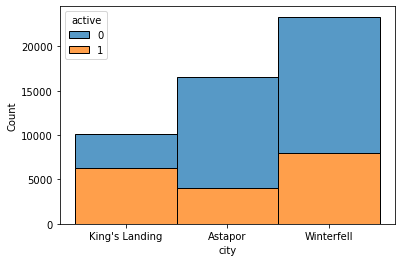

In [18]:
import seaborn as sns
sns.histplot(data=cohort, multiple="stack", x='city', hue='active')
plt.show()

It looks like Winterfell and Astapor City have lost a larger percentage of the cohort... they did start with more than King's landing started with.

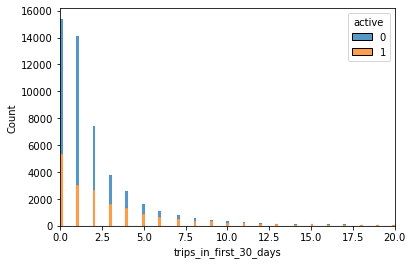

In [19]:
sns.histplot(data=cohort, multiple="stack", x='trips_in_first_30_days', hue='active')
plt.xlim((0,20))
plt.show()

It looks like the majority of the inactive members of the cohort only road a few times in the first 30 days.

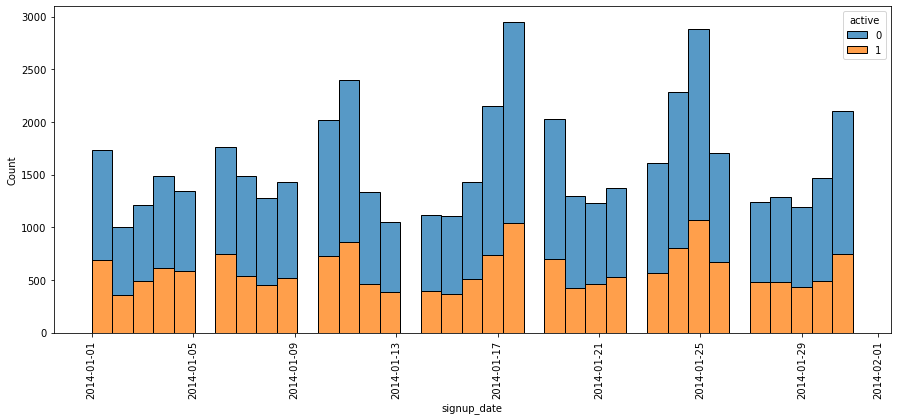

In [20]:
#need to fix the fact that last_trip_date is a string and not a datetime
cohort['signup_date'] = cohort['signup_date'].apply(pd.to_datetime)
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=cohort, multiple="stack", x='signup_date', hue='active')
plt.xticks(rotation=90)
plt.show()

There are not clear signs that signup data impacts retention. there are some interesting spikes.

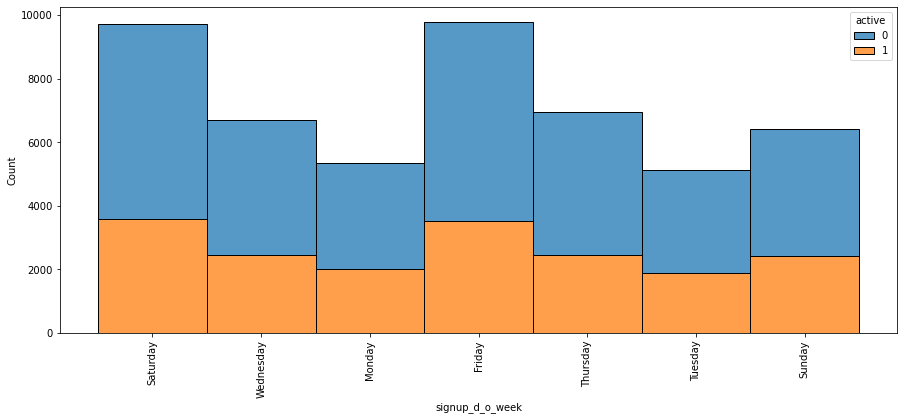

In [21]:
cohort['signup_d_o_week'] = cohort['signup_date'].dt.day_name()
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=cohort, multiple="stack", x='signup_d_o_week', hue='active')
plt.xticks(rotation=90)
plt.show()

It looks like Friday and Saturday are the most popular days for someone to sign up

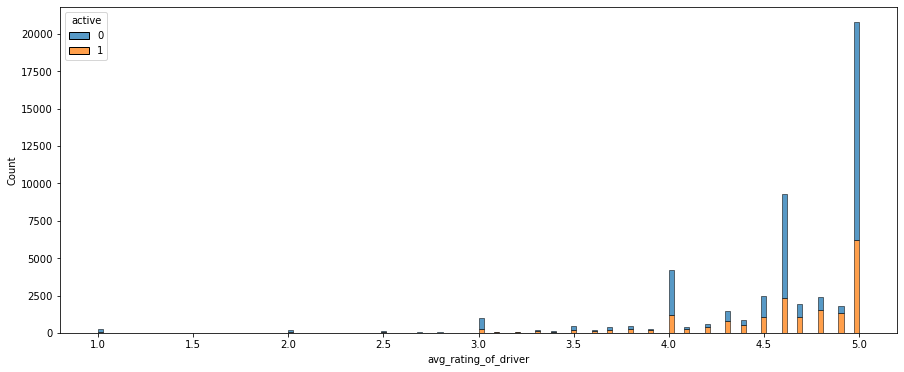

In [22]:
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=cohort, multiple="stack", x='avg_rating_of_driver', hue='active')
plt.show()

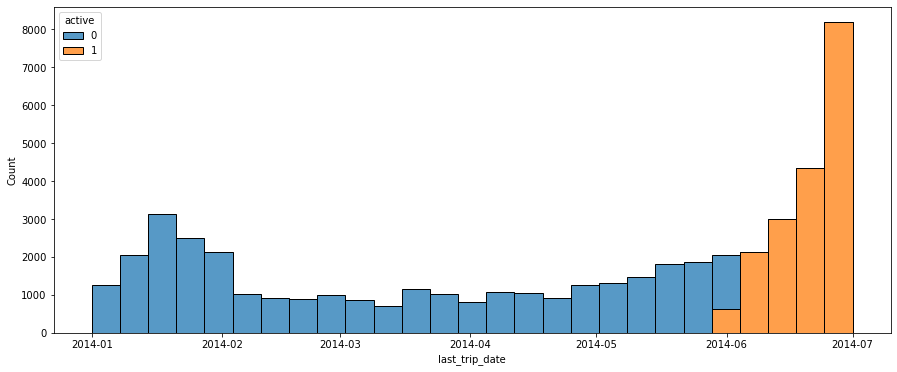

In [23]:
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=cohort, multiple="stack", x='last_trip_date', hue='active')
plt.show()

It looks as though many of the users took their last ride within the first month.

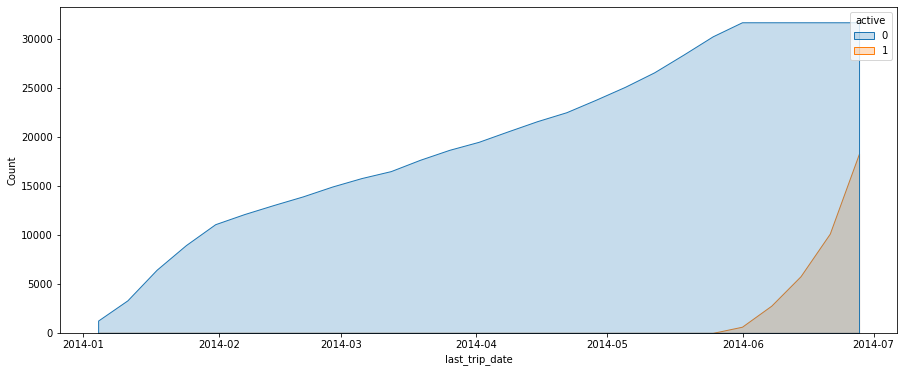

In [40]:
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=cohort, x='last_trip_date', hue='active',cumulative=True,element='poly')
plt.show()

This cumulative histogram shows nicely how the last trip date increases sharply for the first month and then becomes more a more gradual loss after month 1.

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


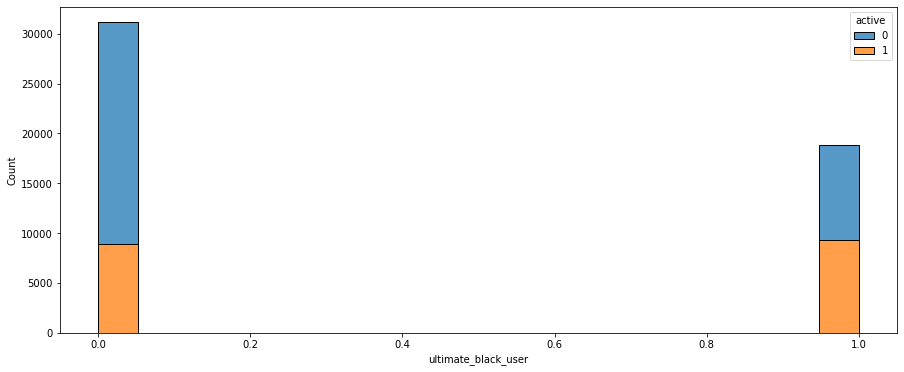

In [24]:
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=cohort, multiple="stack", x='ultimate_black_user', hue='active')
plt.show()

It looks like users who made use of ultimate black were more likely retained.

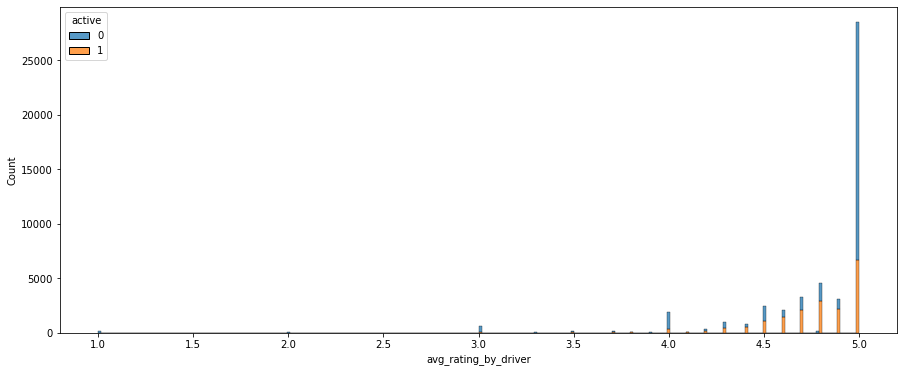

In [25]:
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=cohort, multiple="stack", x='avg_rating_by_driver', hue='active')
plt.show()

There is no obvious relation between avg driver rating retention. The vast majority of this cohort saw an average of 5 star driver (that seems odd to me).

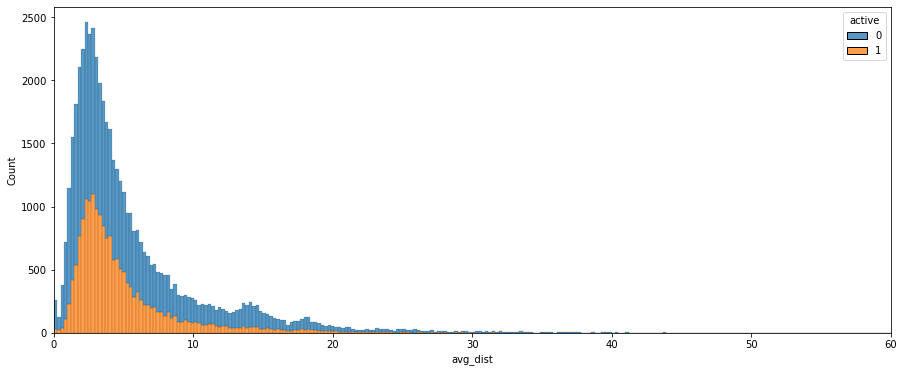

In [26]:
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=cohort, multiple="stack", x='avg_dist', hue='active')
plt.xlim((0,60))
plt.show()

Most of the trips were less than 5 miles (3.88 was the p50). 

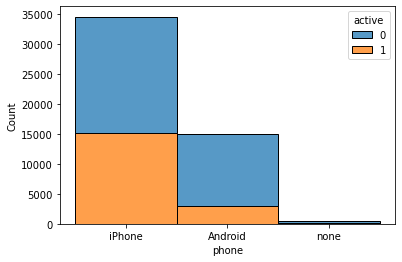

In [27]:
sns.histplot(data=cohort, multiple="stack", x='phone', hue='active')
plt.show()

iPhone seems to be the most popular platform. It appears that more Android users dropped than iPhone. Could there be differences in the app performance or function that drive retention?

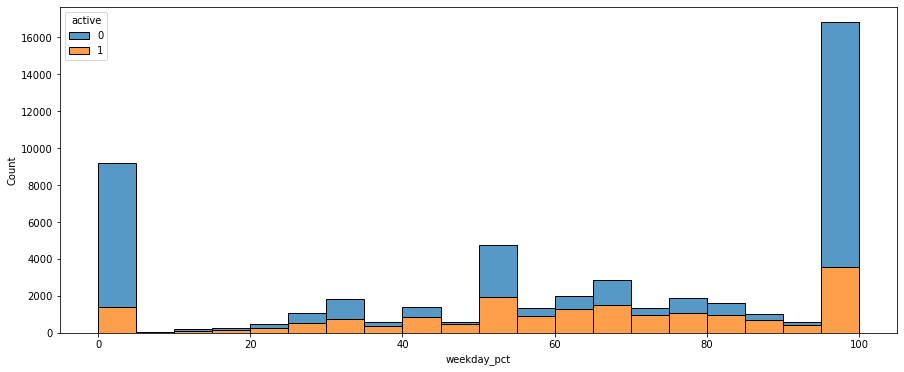

In [45]:
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=cohort, multiple="stack", x='weekday_pct', hue='active',bins=20)
plt.show()

Interestingly there is a large portion of this cohort who either only used ultimate on weekdays or weekends

In [48]:
#prepair to split the data. y will be active, x will be the rest of our columns.
y = cohort['active']
X = cohort.drop(['active','signup_date','last_trip_date'],axis=1)

In [49]:
print(X.columns)

Index(['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'signup_d_o_week'],
      dtype='object')


In [50]:
X = pd.get_dummies(X,columns=['city','phone','signup_d_o_week'],drop_first=True)
print(X.columns)

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'city_King's Landing', 'city_Winterfell',
       'phone_iPhone', 'phone_none', 'signup_d_o_week_Monday',
       'signup_d_o_week_Saturday', 'signup_d_o_week_Sunday',
       'signup_d_o_week_Thursday', 'signup_d_o_week_Tuesday',
       'signup_d_o_week_Wednesday'],
      dtype='object')


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
xscale=StandardScaler()
cols = ['trips_in_first_30_days','avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver']
xscale.fit(X_train[cols])
X_train_scaled = X_train
X_test_scaled = X_test
X_train_scaled[cols] = xscale.transform(X_train[cols])
X_test_scaled[cols] = xscale.transform(X_test[cols])
X_train_scaled.head()

<ipython-input-60-7b73f822f24e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_scaled[cols] = xscale.transform(X_train[cols])
C:\Users\thege\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-60-7b73f822f24e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,phone_none,signup_d_o_week_Monday,signup_d_o_week_Saturday,signup_d_o_week_Sunday,signup_d_o_week_Thursday,signup_d_o_week_Tuesday,signup_d_o_week_Wednesday
38094,-0.339230,0.703330,-0.333651,-0.442572,False,-1.654848,3.167377,0.493653,0,0,0,0,0,1,0,0,0,0
40624,-0.339230,-0.000166,-0.333651,-0.442572,True,-1.654848,0.342761,0.493653,0,0,1,0,0,1,0,0,0,0
49425,-0.339230,0.703330,-0.333651,-0.442572,False,-1.654848,-0.223917,0.493653,0,0,0,0,0,1,0,0,0,0
35734,0.723165,0.350205,0.696307,0.273545,False,-0.881178,-0.660767,-0.400847,0,1,1,0,0,0,0,0,0,0
41708,1.254363,0.526768,-0.333651,-0.442572,True,0.254980,-0.462518,0.270028,1,0,1,0,0,0,0,0,0,0


In [67]:
#create a Random Forest Classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
# accuracy score based on test data
print(accuracy_score(rfc.predict(X_test_scaled), y_test))

0.7683333333333333


In [79]:
#attempt to tune this model to be a little better
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
rfc2 = RandomForestClassifier(random_state=42)
params = dict(n_estimators=range(10,400))
rf_cv = RandomizedSearchCV(rfc2, params, random_state=42)
rf_cv.fit(X_train_scaled, y_train)
print(accuracy_score(rf_cv.predict(X_test_scaled), y_test))
print('Best n_estimators: '+str(rf_cv.best_params_))

0.7671333333333333
Best n_estimators: {'n_estimators': 282}


While not perfect this model seems to perform reasonably at predicting user retention.

In [83]:
#lets look at the top 10 features based on importance.
rfc2 = RandomForestClassifier(random_state=42,n_estimators=282)
rfc2.fit(X_train_scaled, y_train)
y_test_pred = rfc2.predict(X_test_scaled)
feat_imp = pd.Series(rfc2.feature_importances_, index = X_train_scaled.columns).sort_values(ascending = False)
feat_imp[:10]

avg_dist                  0.237806
weekday_pct               0.127818
avg_rating_by_driver      0.110550
avg_rating_of_driver      0.079909
trips_in_first_30_days    0.077397
surge_pct                 0.075362
avg_surge                 0.066309
city_King's Landing       0.063215
phone_iPhone              0.038422
ultimate_black_user       0.033874
dtype: float64

Several of the most important features like avg_dist and weekday_pct are driven by the users, while advertising on providing special deals may allow ultimate to change this behavior, additional research would need to be performed. The rating system could potentially be utilized to funnel at risk user toward drivers that are more likely to promote retention based on their rating.

In [81]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,classification_report
from sklearn import metrics
print("Random Forest Model - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_test_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_test_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_test_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,y_test_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_test_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,y_test_pred, pos_label = 0))

Random Forest Model - no max depth
Accuracy: 0.7671333333333333
Balanced accuracy: 0.7420544700106337
Precision score for "Yes" 0.6935232149824424
Precision score for "No" 0.8053473769495645
Recall score for "Yes" 0.6490779623881687
Recall score for "No" 0.8350309776330989


In [82]:
confusion_matrix = pd.crosstab(y_test,y_test_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     0     1
Actual               
0          7952  1571
1          1922  3555


This model suggests that avg_dist, weekday_pct, and both the driver and user's ratings are the top 4 leading features in predicting retention. While the only the ratings are truely in the control of Ultimate with may indicate that there is oportunity in additional training of drivers and funneling new users to higher rated drivers could positively impact user retention. 